In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import scipy.stats as stats

pd.set_option('display.float_format', lambda x: '%.2f' % x)
path = '../../../../playwright/results/core-web-vitals/testrun-8/'

def graph_row(plot_func, datasets, height=3, width=20):
    cols = len(datasets)
    fig, axes = plt.subplots(ncols=cols, figsize=(width, height))
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)
    for x, (name, dataset) in enumerate(datasets.items()):
        plot_func(dataset, axes[x], idx=x)
        axes[x].set_title(name)
    return plt

In [2]:
df = pd.read_csv(f'{path}2024-12-19T09:12:33.629Z_results-monolith.csv', sep=',')
df_t = pd.read_csv(f'{path}2024-12-19T10:13:15.254Z_results-monolith-throttled.csv', sep=',')
# df_ht = pd.read_csv(f'{path}xyz.csv', sep=',')

features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']

dirty_dfs = {
    'default': df[5:],
    'throttled': df_t[5:],
    # 'heavy': df_ht[5:],
}

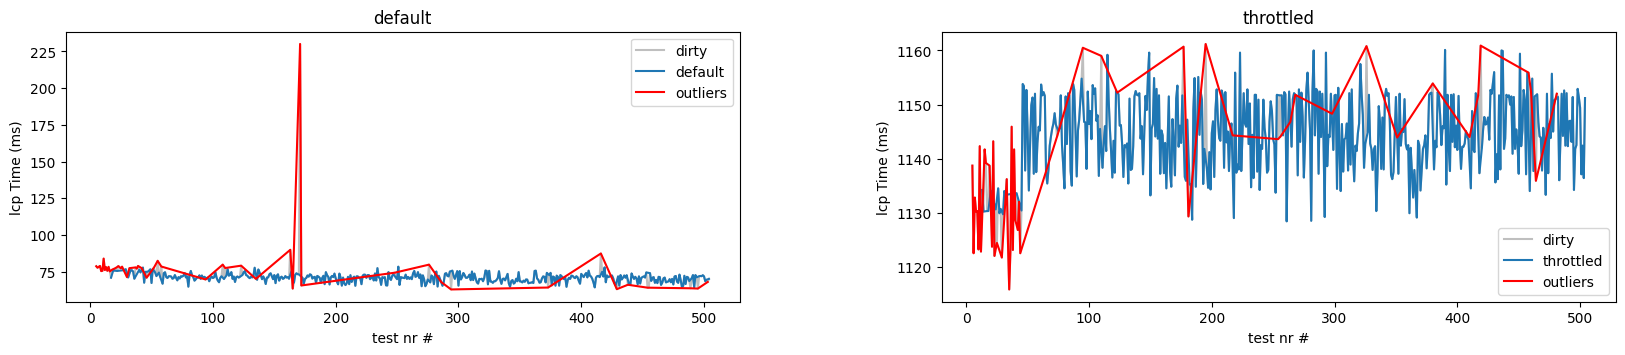

In [3]:
def detect_outliers(_df, _features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(_df[_features])
    return outliers == 1

def plot_outliers(_df, d, loc, mask):
    loc.plot(_df['lcp'], label='dirty', color='gray', alpha=0.5)
    loc.plot(_df['lcp'][mask[d]], label=d)
    loc.plot(_df['lcp'][~mask[d]], label='outliers', color='red')

    loc.set_title(d)
    loc.set_ylabel(f'lcp Time (ms)') 
    loc.set_xlabel('test nr #') 
    loc.legend()

masks = {}
dfs = {}
target_features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb']

for name, _df in dirty_dfs.items():
    mask = detect_outliers(_df, target_features)
    masks[name] = mask
    dfs[name] = _df[mask].copy()

graph_row(lambda _ds, loc, idx: plot_outliers(_ds, list(dfs.keys())[idx], loc, masks), dirty_dfs)
plt.show()

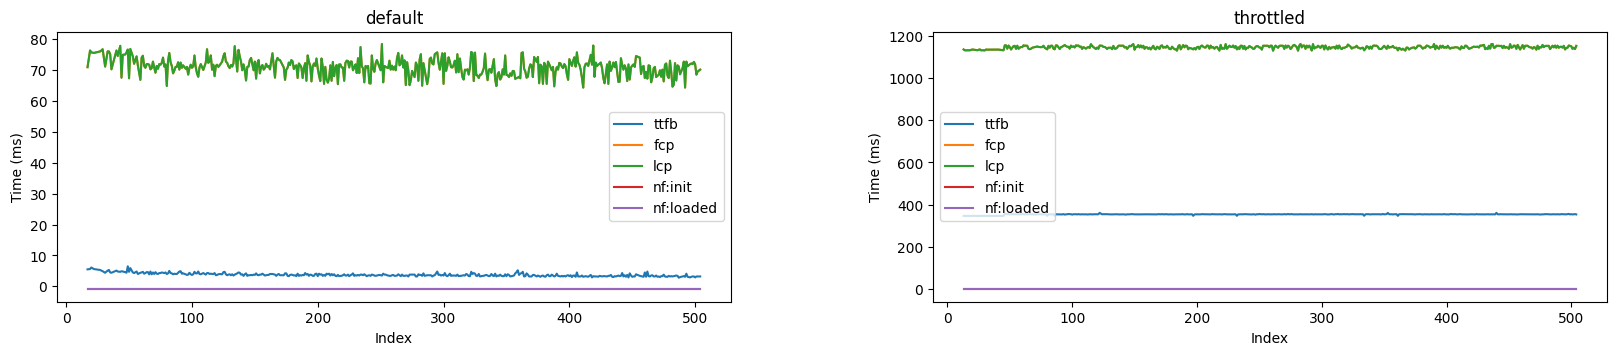

In [4]:
def plot_line(dataset, loc, idx):
    for t in ['ttfb', 'fcp', 'lcp', 'nf:init', 'nf:loaded']:
        loc.plot(dataset[t], label=t)
    loc.set_xlabel('Index')
    loc.set_ylabel('Time (ms)')
    loc.legend()

graph_row(plot_line, dfs)
plt.show()

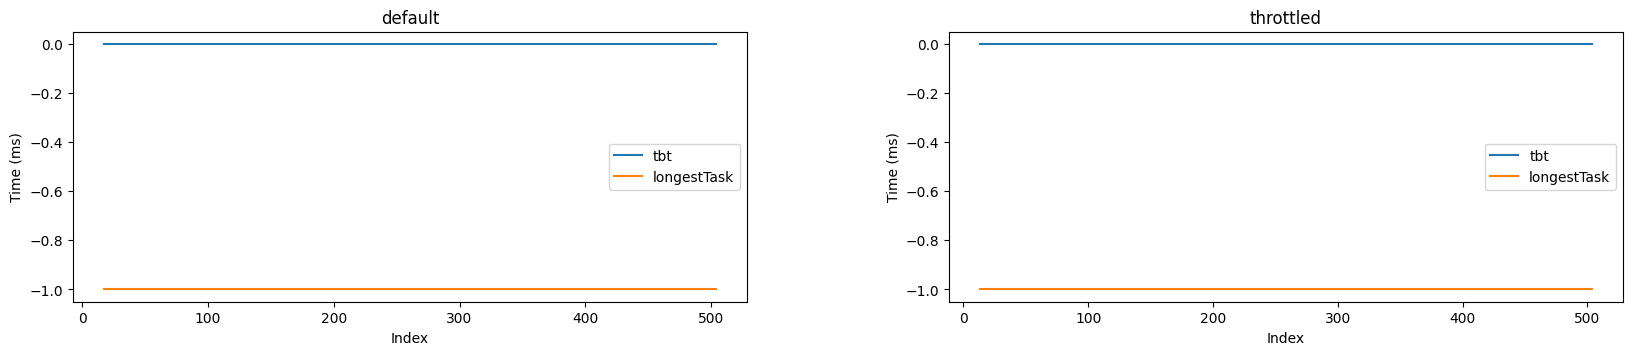

In [5]:
def plot_line(dataset, loc, idx):
    for t in ['tbt', 'longestTask']:
        loc.plot(dataset[t], label=t)
    loc.set_xlabel('Index')
    loc.set_ylabel('Time (ms)')
    loc.legend()

graph_row(plot_line, dfs)
plt.show()

In [6]:
dfs['default'].describe()

,idx,navTime,totalTime,lcp,fcp,ttfb,tbt,tti,longTasks,longestTask,nf:init,nf:config,nf:loaded,error
count,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,0.00
mean,268.02,8.53,65.05,70.91,70.91,3.74,0.00,70.91,0.00,-1.00,-1.00,-1.00,-1.00,NaN
std,136.53,0.81,3.64,2.77,2.77,0.54,0.00,2.77,0.00,0.00,0.00,0.00,0.00,NaN
min,18.00,7.00,58.00,64.30,64.30,2.80,0.00,64.30,0.00,-1.00,-1.00,-1.00,-1.00,NaN
25%,151.25,8.00,62.00,69.33,69.33,3.40,0.00,69.33,0.00,-1.00,-1.00,-1.00,-1.00,NaN
50%,268.50,8.00,64.00,71.10,71.10,3.60,0.00,71.10,0.00,-1.00,-1.00,-1.00,-1.00,NaN
75%,384.75,9.00,68.00,72.40,72.40,4.00,0.00,72.40,0.00,-1.00,-1.00,-1.00,-1.00,NaN
max,505.00,12.00,75.00,78.40,78.40,6.50,0.00,78.40,0.00,-1.00,-1.00,-1.00,-1.00,NaN


In [7]:
dfs['throttled'].describe()

,idx,navTime,totalTime,lcp,fcp,ttfb,tbt,tti,longTasks,longestTask,nf:init,nf:config,nf:loaded,error
count,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,0.00
mean,267.47,335.39,1139.78,1144.63,1144.63,354.21,0.00,1144.63,0.00,-1.00,-1.00,-1.00,-1.00,NaN
std,137.73,2.03,6.96,6.94,6.94,1.71,0.00,6.94,0.00,0.00,0.00,0.00,0.00,NaN
min,14.00,327.00,1122.00,1128.40,1128.40,346.40,0.00,1128.40,0.00,-1.00,-1.00,-1.00,-1.00,NaN
25%,149.25,335.00,1135.00,1138.23,1138.23,354.10,0.00,1138.23,0.00,-1.00,-1.00,-1.00,-1.00,NaN
50%,269.00,336.00,1140.00,1144.40,1144.40,354.40,0.00,1144.40,0.00,-1.00,-1.00,-1.00,-1.00,NaN
75%,385.75,336.00,1145.00,1151.50,1151.50,354.80,0.00,1151.50,0.00,-1.00,-1.00,-1.00,-1.00,NaN
max,505.00,342.00,1155.00,1160.10,1160.10,361.50,0.00,1160.10,0.00,-1.00,-1.00,-1.00,-1.00,NaN


In [8]:
# dfs['heavy'].describe()

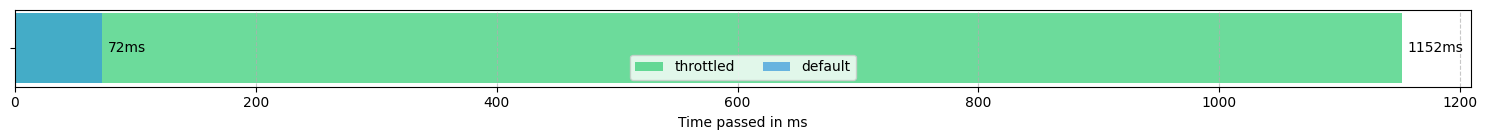

In [9]:
fig, ax = plt.subplots(figsize=(15, 1.5))

fcp_values = [df['fcp'].quantile(0.75) for df in dfs.values()]

bar_height = 0.25
colors = ['#2ecc71', '#3498db', '#e74c3c']

bars = []
for i, (name, value) in enumerate(zip(reversed(dfs.keys()), reversed(fcp_values))):
    bar = ax.barh(0.5, value, height=bar_height, 
                 label=name, color=colors[i], alpha=0.7)
    bars.append(bar)

ax.set_yticks([0.5])
ax.set_yticklabels([''])
ax.set_xlabel('Time passed in ms')

ax.grid(True, axis='x', linestyle='--', alpha=0.7)

for i, bar in enumerate(bars):
    width = bar[0].get_width()
    ax.text(width + 5, bar[0].get_y() + bar[0].get_height()/2, 
            f'{fcp_values[-(i+1)]:.0f}ms', 
            va='center')

ax.legend(loc='lower center', ncols=3)

plt.tight_layout()

plt.show()

/var/folders/n3/c303nvyx3yv3x75n2g2xfh1h0000gn/T/ipykernel_9542/4216448477.py:10: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[idx].set_ylim(0, max_height * 1.2)


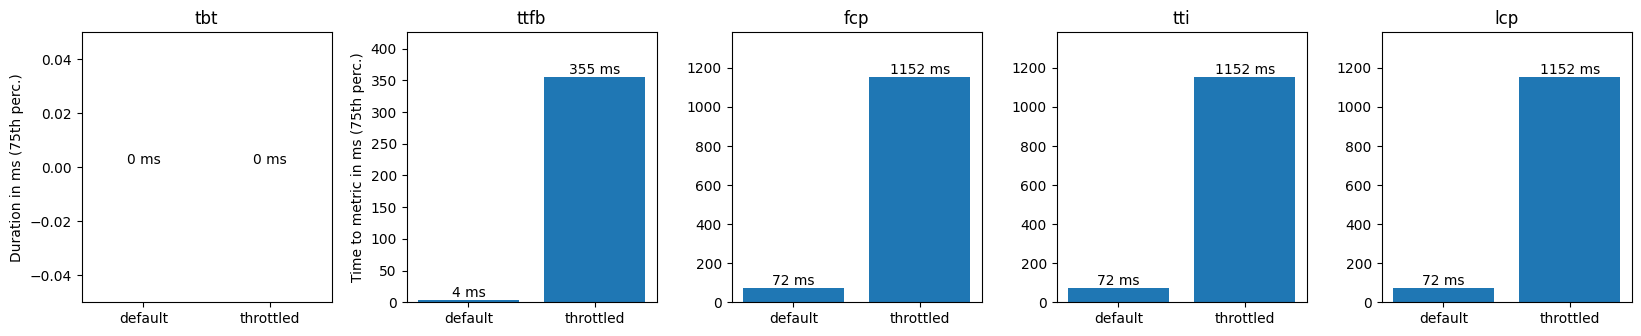

In [10]:
features = ['tbt','ttfb', 'fcp', 'tti', 'lcp']
fig, axes = plt.subplots(ncols=len(features), figsize=(20, 3))
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)

for idx, feature in enumerate(features):
    percentiles = {d: dfs[d][feature].quantile(0.75) for d in dfs.keys()}
    bars = axes[idx].bar(percentiles.keys(), percentiles.values())
    
    max_height = max(percentiles.values())
    axes[idx].set_ylim(0, max_height * 1.2)
    
    for bar in bars:
        height = bar.get_height()
        label = f'{int(round(height, 0))} ms'
        axes[idx].text(bar.get_x() + bar.get_width()/2., height, label, ha='center', va='bottom')
    
    axes[idx].set_title(feature)
    if idx == 0:
        axes[idx].set_ylabel('Duration in ms (75th perc.)')
    if idx == 1:
        axes[idx].set_ylabel('Time to metric in ms (75th perc.)')

plt.show()

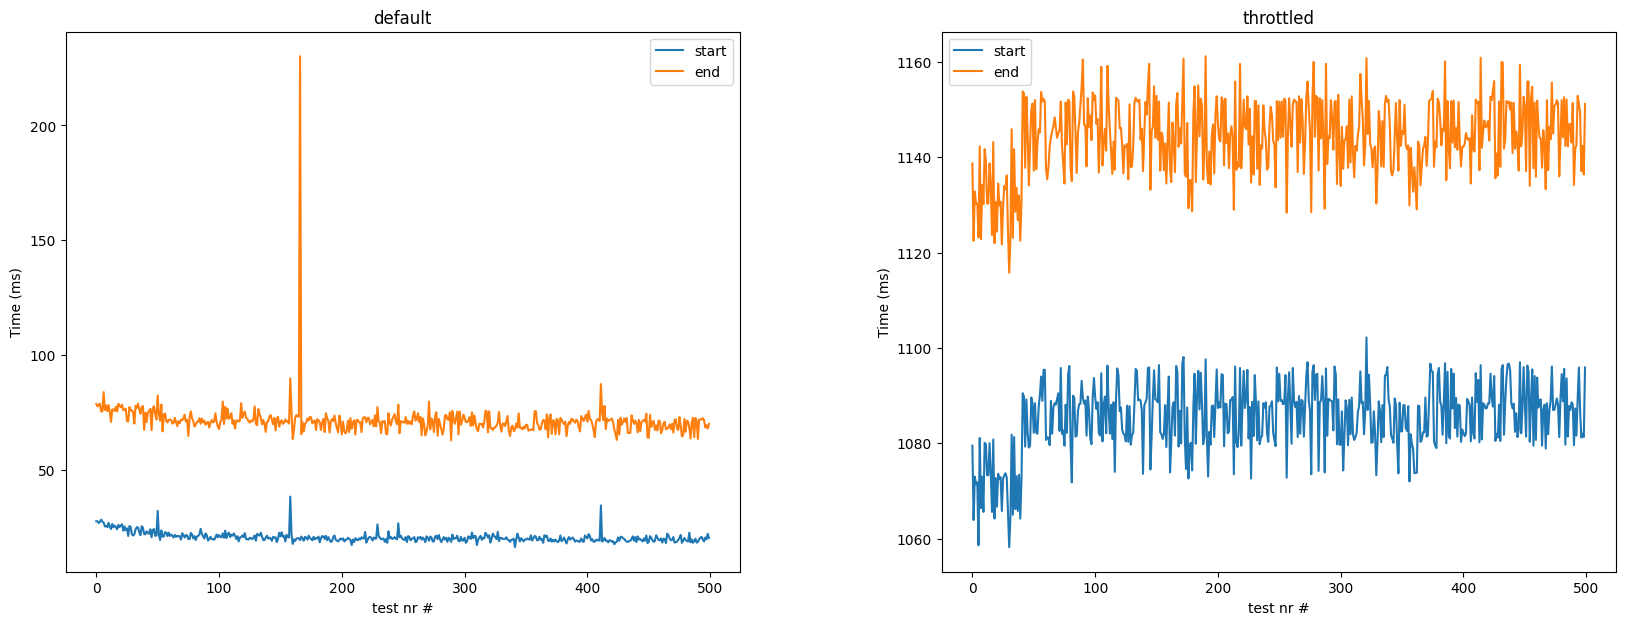

In [11]:
det_df = pd.read_csv(f'{path}details/2024-12-19T09:12:33.634Z_details-monolith.csv', sep=',')
det_df_t = pd.read_csv(f'{path}details/2024-12-19T10:13:15.258Z_details-monolith-throttled.csv', sep=',')
# det_df_ht = pd.read_csv(f'{path}details/xyz.csv', sep=',')

lcp_dfs = {
  'default': det_df[(det_df['type'] == 'LCP') & (det_df['idx'] > 5)].reset_index(drop=True),
  'throttled': det_df_t[(det_df_t['type'] == 'LCP') & (det_df_t['idx'] > 5)].reset_index(drop=True),
  # 'heavy': det_df_ht[(det_df_ht['type'] == 'LCP') & (det_df_ht['idx'] > 5)].reset_index(drop=True),
}
lcp_features = ['start','end','duration','name','element','url','id']


def plot_lcp_line(_df, loc, idx):
  for f in ['start', 'end']:
    loc.plot(_df[f], label=f)
  
  loc.set_title("LCP")
  loc.set_ylabel('Time (ms)')
  loc.set_xlabel('test nr #')
  loc.legend()

graph_row(plot_lcp_line, lcp_dfs, height=6)
plt.show()